**Project Title** -- Analyzing Zipf's Law in Eminem's Lyrics

---
Members -- 1. Aditya Chopra (aditya.chopra@adypu.edu.in)
           2. Progyan Sen (progyan.sen@adypu.edu.in)
           3. Hariksh Mahendra Suryawanshi (hariksh.suryawanshi@adypu.edu.in)
           4. Ankit Kumar (ankit.kumar2@adypu.edu.in)


In [19]:
from google.colab import files
uploaded = files.upload()



Saving Eminem.csv to Eminem.csv


In [20]:
import pandas as pd

# Load the uploaded CSV file
df = pd.read_csv("Eminem.csv")

# Preview the data
df.head()


,Unnamed: 0,Artist,Title,Album,Year,Date,Lyric
0,0,Eminem,Rap God,The Marshall Mathers LP2 (Deluxe),2013.0,2013-10-15,look i was gonna go easy on you not to hurt yo...
1,1,Eminem,Killshot,NaN,2018.0,2018-09-14,you sound like a bitch bitch shut the fuck up ...
2,2,Eminem,Godzilla,Music to Be Murdered By,2020.0,2020-01-17,ugh you're a monster eminem i can swallow a ...
3,3,Eminem,Lose Yourself,The Singles,2002.0,2002-10-28,look if you had one shot or one opportunity to...
4,4,Eminem,The Monster,The Marshall Mathers LP2 (Deluxe),2013.0,2013-10-29,rihanna i'm friends with the monster that's un...


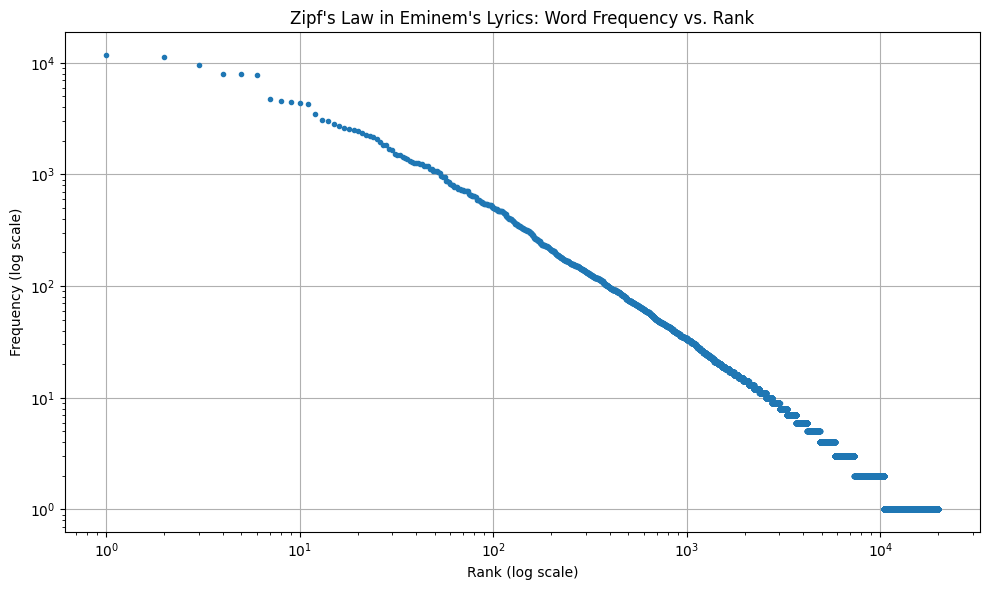

In [21]:
import re
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Combine all lyrics into a single string
all_lyrics = " ".join(df["Lyric"].dropna().astype(str)).lower()

# Step 2: Clean and tokenize the text (keep only words)
cleaned_text = re.sub(r'[^a-zA-Z\s]', '', all_lyrics)
words = cleaned_text.split()

# Step 3: Count word frequencies
word_freq = Counter(words)
sorted_freq = sorted(word_freq.values(), reverse=True)

# Step 4: Prepare rank data
ranks = range(1, len(sorted_freq) + 1)

# Step 5: Plot Zipf's Law
plt.figure(figsize=(10, 6))
plt.loglog(ranks, sorted_freq, marker='.', linestyle='none')
plt.title("Zipf's Law in Eminem's Lyrics: Word Frequency vs. Rank")
plt.xlabel("Rank (log scale)")
plt.ylabel("Frequency (log scale)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [23]:
#import re
from collections import Counter

# Combine all lyrics into one string
all_lyrics = " ".join(df["Lyric"].dropna().astype(str)).lower()

# Extract words using regex
words = re.findall(r'\b\w+\b', all_lyrics)

# Count word frequencies
word_counts = Counter(words)

# Get top 20 most common words
top_words = word_counts.most_common(50)

# Print nicely
print("Top 20 Words in Lyrics:")
for rank, (word, freq) in enumerate(top_words, 1):
    print(f"{rank:2}. {word:<15} {freq}")


Top 20 Words in Lyrics:
 1. i               17786
 2. the             11157
 3. you             10819
 4. and             8008
 5. a               7970
 6. to              7781
 7. it              6311
 8. s               5821
 9. t               4814
10. m               4600
11. my              4576
12. me              4347
13. in              4296
14. that            3804
15. of              3498
16. like            3064
17. on              2829
18. your            2719
19. this            2601
20. with            2559
21. but             2497
22. just            2457
23. is              2360
24. up              2267
25. so              2217
26. don             2100
27. get             2094
28. be              1962
29. for             1850
30. what            1817
31. we              1815
32. can             1739
33. all             1734
34. cause           1703
35. no              1538
36. when            1497
37. they            1479
38. re              1397
39. got             139

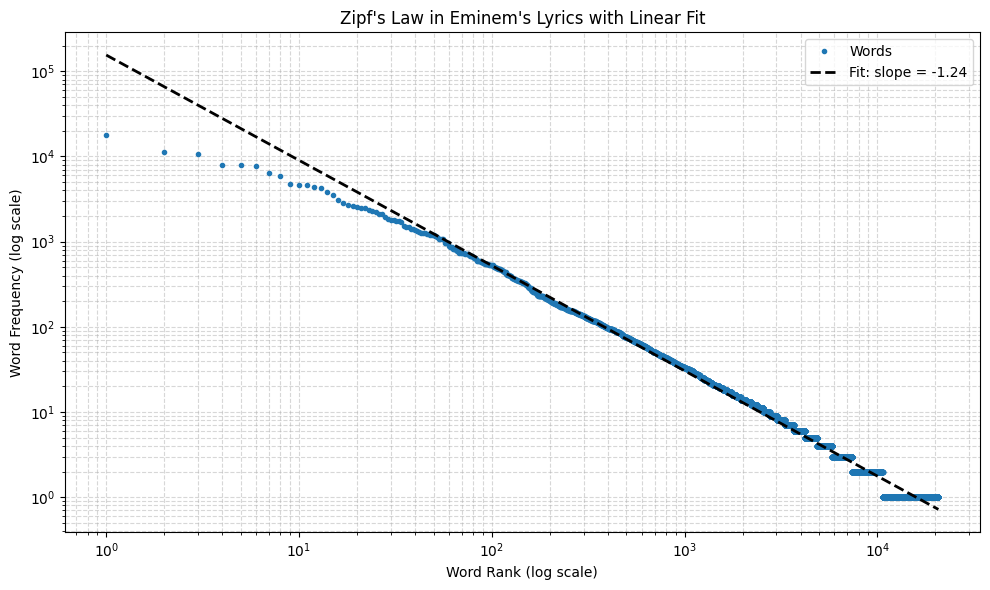

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from collections import Counter
import re

# Combine lyrics
all_lyrics = " ".join(df["Lyric"].dropna().astype(str)).lower()
words = re.findall(r'\b\w+\b', all_lyrics)

# Count word frequencies
word_counts = Counter(words)
sorted_counts = sorted(word_counts.values(), reverse=True)

# Prepare rank and frequency data
ranks = np.arange(1, len(sorted_counts) + 1)
frequencies = np.array(sorted_counts)

# Log transformation for linear regression
log_ranks = np.log10(ranks)
log_freqs = np.log10(frequencies)

# Linear regression on log-log data
slope, intercept, r_value, _, _ = linregress(log_ranks, log_freqs)
fit_line = 10**(intercept + slope * log_ranks)

# Plot
plt.figure(figsize=(10, 6))
plt.loglog(ranks, frequencies, marker='.', linestyle='none', label='Words')
plt.loglog(ranks, fit_line, linestyle='--', color='black', linewidth=2,
           label=f'Fit: slope = {slope:.2f}')

plt.title("Zipf's Law in Eminem's Lyrics with Linear Fit")
plt.xlabel("Word Rank (log scale)")
plt.ylabel("Word Frequency (log scale)")
plt.grid(True, which='both', linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


<ipython-input-26-71186b80f0fd>:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab20", len(album_groups))


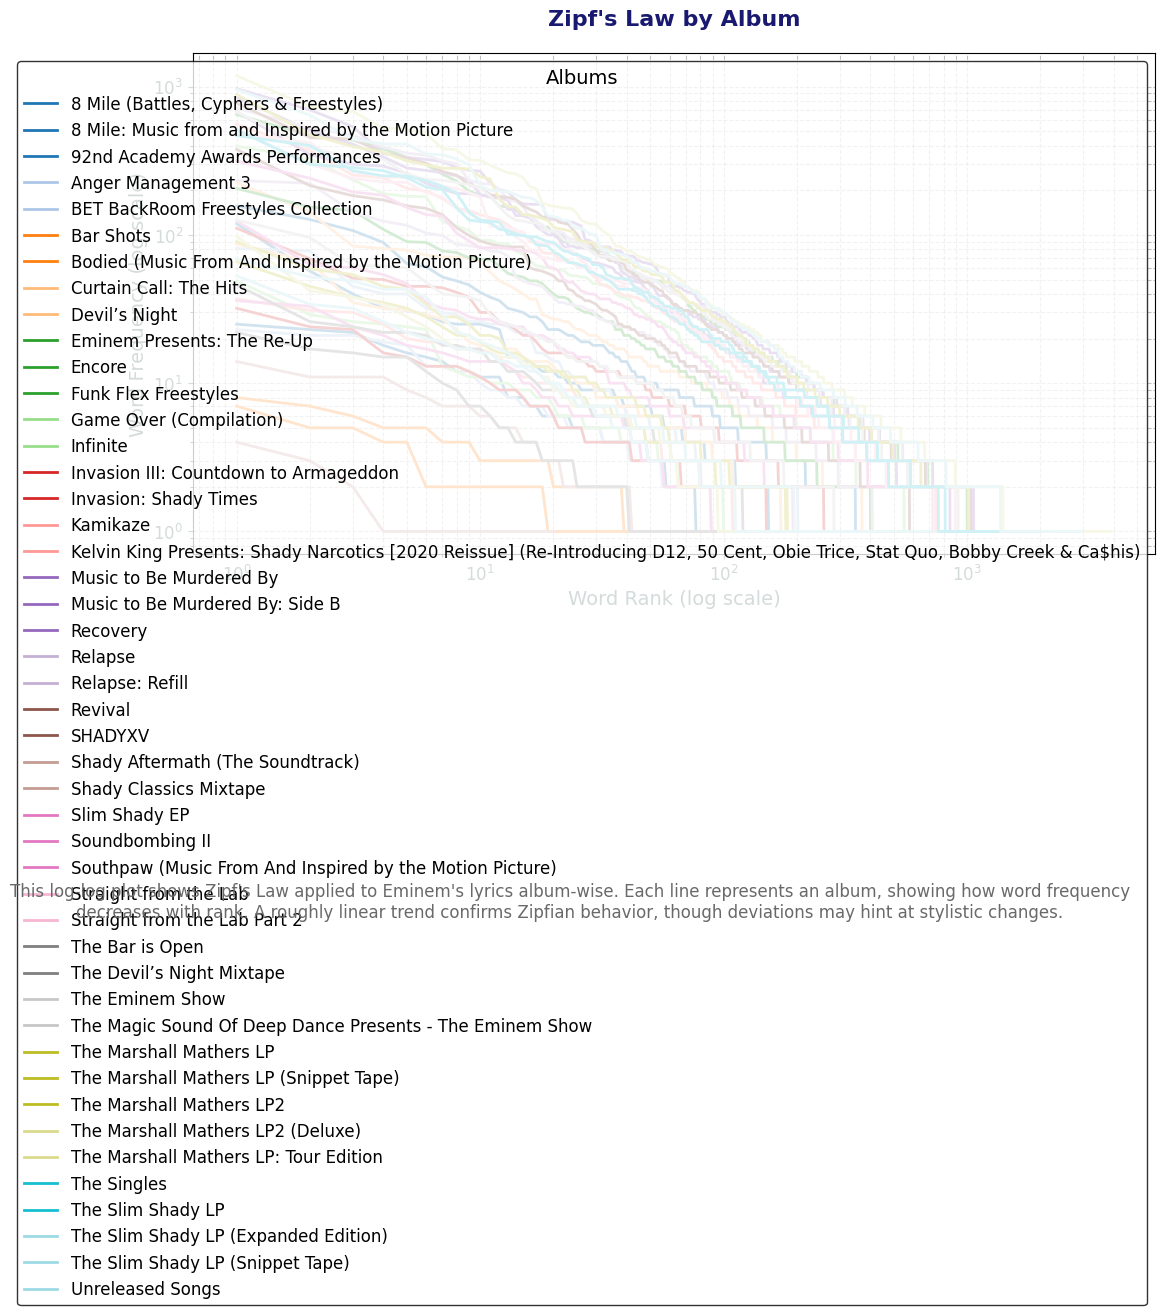

In [26]:
import matplotlib.pyplot as plt
import re
from collections import Counter

# Group lyrics by album
album_groups = df.groupby("Album")

# Create plot
fig, ax = plt.subplots(figsize=(12, 8))

# Set a clean color palette for each album
colors = plt.cm.get_cmap("tab20", len(album_groups))

# Plot each album with different colors
for i, (album, group) in enumerate(album_groups):
    lyrics = " ".join(group["Lyric"].dropna().astype(str)).lower()
    words = re.findall(r'\b\w+\b', lyrics)
    counts = sorted(Counter(words).values(), reverse=True)
    ax.plot(range(1, len(counts) + 1), counts, label=album, color=colors(i), linewidth=2)

# Styling
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_title("Zipf's Law by Album", fontsize=16, weight='bold', color='midnightblue', pad=20)
ax.set_xlabel("Word Rank (log scale)", fontsize=14, color='darkslategray')
ax.set_ylabel("Word Frequency (log scale)", fontsize=14, color='darkslategray')

# Grid with cleaner design
ax.grid(True, which="both", linestyle="--", alpha=0.5, color='gray')

# Ticks styling
ax.tick_params(axis='both', labelsize=12, colors='darkslategray')

# Legend Styling
legend = ax.legend(facecolor='white', edgecolor='black', fontsize=12, title='Albums', title_fontsize=14)
for text in legend.get_texts():
    text.set_color('black')

# Add description below plot
description = (
    "This log-log plot shows Zipf's Law applied to Eminem's lyrics album-wise. "
    "Each line represents an album, showing how word frequency decreases with rank. "
    "A roughly linear trend confirms Zipfian behavior, though deviations may hint at stylistic changes."
)
fig.text(0.5, -0.15, description, wrap=True, ha='center', fontsize=12, color='dimgray')

# Tight layout and space for description
plt.tight_layout()
plt.subplots_adjust(bottom=0.3)

plt.show()






###
 **Team Contributions**

* **Progyan Sen**
  Worked on writing and organizing the Jupyter Notebook, implemented Zipf’s Law visualizations, and contributed to the research on word frequency analysis. Also helped refine the final results.

* **Hariksh Mahendra Suryawanshi**
  Focused on data preprocessing, regex-based text cleaning, and plotting log-log graphs. Contributed significantly to exploring Zipf's Law and structuring the notebook flow.

* **Aditya Chopra**
  Designed and structured the PowerPoint presentation. Summarized technical content into easy-to-understand slides and helped with visual storytelling of the project.

* **Ankit Kumar**
  Contributed to the presentation design, formatted charts and explanations, and ensured the project message was communicated clearly. Also assisted in final content polishing.


